1. mirror mount positions go from 0 to 1 (or any arbitrary continuous range really)

2. ion responses go from 0 to 100 photons per measurement round (or any arbitrary , small,
integer range)

In [29]:
from typing import List, Dict
from abc import ABC, abstractmethod
import math
from operator import itemgetter

import scipy.stats as stats
import numpy
import matplotlib.pyplot as plt



class IonSystem(ABC):
    _max_ion_response = 100

    @abstractmethod
    def move_mirror_to_position(self, pos: float) -> None:
        """
        Move position to pos. 0-1

        """
        ...

    @abstractmethod
    def measure_ion_response(self) -> int:
        """
        Return the ion response 0 to _max_ion_response

        """
        ...

class GaussianIonSystem(IonSystem):
    def __init__(self, peak_location: float, variance: float):
        # define constants
        self.peak_location: float = peak_location
        self.variance: float = variance
        self.pos: float = 0.

    @property
    def sigma(self) -> float:
        return math.sqrt(self.variance)

    def move_mirror_to_position(self, pos: float) -> None:
        """
        Move position to pos. 0-1

        """
        self.pos = pos

    def measure_ion_response(self) -> int:
        """
        Return the ion response 0 to _max_ion_response

        """
        return round(
            self._max_ion_response *
            stats.norm.pdf(self.pos, self.peak_location, self.sigma)
            )

In [33]:
def scan_example(ion_system: IonSystem) -> float:
    """
    Return the optimal position.

    """
    move_mirror_to_position = ion_system.move_mirror_to_position
    measure_ion_response = ion_system.measure_ion_response
    start = 0
    stop = 1
    step = .01

    def pick_best_position(ion_responses: Dict[float, int]) -> float:
        ion_response_list = list(ion_responses.items())
        ion_response_list.sort(key = itemgetter(1), reverse=True)
        return ion_response_list[0][0]

    ion_responses: Dict[float, int] = {}
    for pos in numpy.arange(start, stop, step):
        move_mirror_to_position(pos)
        ion_response = measure_ion_response()
        ion_responses[pos] = ion_response
    return pick_best_position(ion_responses)



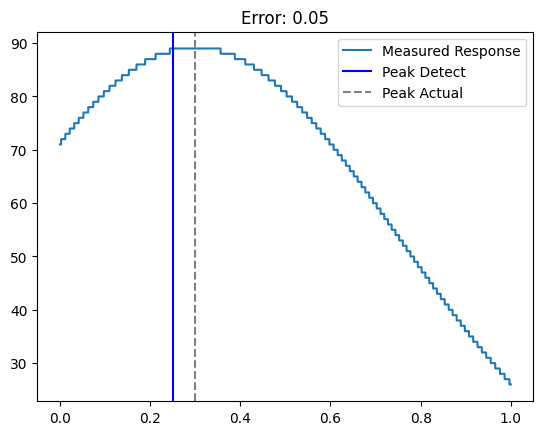

In [45]:
peak_location = .3
cur_ion_sys = GaussianIonSystem(peak_location=peak_location, variance=.2)
scan_result = scan_example(cur_ion_sys)

ion_responses: List[int] = []
pos_scan = numpy.arange(0, 1, .0001)
for pos in pos_scan:
    cur_ion_sys.move_mirror_to_position(pos)
    ion_response = cur_ion_sys.measure_ion_response()
    ion_responses.append(ion_response)

plt.plot(pos_scan, ion_responses, label="Measured Response")
plt.axvline(scan_result, color='blue', label='Peak Detect')
plt.axvline(peak_location, linestyle='dashed', color='gray', label='Peak Actual')
# dont use percent error because peak could be near zero.
error = abs(scan_result - peak_location)
plt.title(f'Error: {error:.02f}')
plt.legend()
plt.show()
